In [1]:
import numpy as np
import igraph as ig

In [2]:
initial_tree = np.array([
    [0, 1, 1, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 0]
])

In [3]:
# create properties per GU index
gus = np.array([0, 1, 2, 3])
position = np.array(['apical', 'apical', 'lateral', 'apical'])
nb_fruits = np.array([0, 1, 2, 0])
nb_leaves = np.array([1, 2, 2, 1])

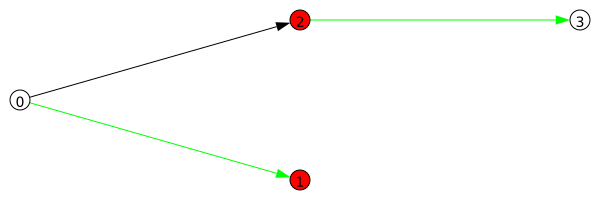

In [4]:
# plot tree and vertex properties
graph = ig.Graph.Adjacency(initial_tree.tolist())
layout = graph.layout_reingold_tilford()
layout.rotate(-90)
ig.plot(graph, layout=layout, bbox=(600, 200), **{
    'vertex_color': ['white' if f == 0 else 'red' for f in nb_fruits],
    'vertex_label': [i for i in gus],
    'edge_color': [ 'green' if position[c] == 'apical' else 'black' for p, c in graph.get_edgelist()]

})

In [5]:
# define flows from GU row index _> GU column index
gu_x_gu = np.array([
    [0, 0.5, 0.5, 0],
    [0, 1  , 0  , 0],
    [0, 0  , 1  , 0],
    [0, 0  , 1  , 0]
])

In [6]:
# extract edges
edges = np.argwhere(gu_x_gu)
edges

array([[0, 1],
       [0, 2],
       [1, 1],
       [2, 2],
       [3, 2]])

In [7]:
# flow coef. per edge
edges_flow = gu_x_gu[tuple(edges.transpose())]
edges_flow

array([0.5, 0.5, 1. , 1. , 1. ])

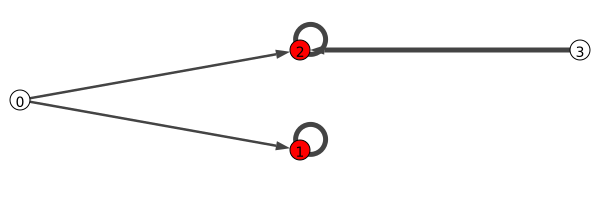

In [8]:
# display flows
graph_flow = ig.Graph.Adjacency((gu_x_gu > 0).tolist())
ig.plot(graph_flow, layout=layout, bbox=(600, 200), **{
    'vertex_color': ['white' if f == 0 else 'red' for f in nb_fruits],
    'vertex_label': [i for i in gus],
    'edge_width': [f*5 for f in edges_flow]

}, margin=(20,50,20,50))

In [9]:
# examples for computing aggregates based on flow coef.
gu_x_gu.transpose() * nb_leaves

array([[0. , 0. , 0. , 0. ],
       [0.5, 2. , 0. , 0. ],
       [0.5, 0. , 2. , 1. ],
       [0. , 0. , 0. , 0. ]])

In [10]:
np.sum(gu_x_gu.transpose()  * nb_leaves, 1)

array([0. , 2.5, 3.5, 0. ])

In [11]:
gu_x_gu.transpose() * nb_fruits

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 0.]])

In [12]:
np.sum(gu_x_gu.transpose() * nb_fruits, 1)

array([0., 1., 2., 0.])

In [13]:
# leaf-fruit ratio
np.sum(gu_x_gu.transpose() * nb_leaves, 1) / np.sum(gu_x_gu.transpose() * nb_fruits, 1)

<ipython-input-13-7a78f33228cf>:2: RuntimeWarning: invalid value encountered in true_divide
  np.sum(gu_x_gu.transpose() * nb_leaves, 1) / np.sum(gu_x_gu.transpose() * nb_fruits, 1)


array([ nan, 2.5 , 1.75,  nan])